In [1]:
import numpy as np
import json
from SCF_method.calculation_executor import ExecutorSCF
from SCF_method.output_handler import OutputHandlerSCF

In [2]:
with open('SCF_method\input_data\H2_gaussian.json') as input_file:
    input_dict = json.load(input_file)
input_dict

{'molecule_definition': {'nuclei_positions': [[0, 0, 0.70053],
   [0, 0, -0.70053]],
  'atomic_numbers': [1, 1],
  'number_of_electrons': 2},
 'basis': {'type': 'gaussian',
  'params': {'alphas': [4.3448, 0.66049, 0.13669],
   'nuclei_positions': [[0, 0, 0.70053], [0, 0, -0.70053]],
   'normalization_factors': [[1, 1, 1], [1, 1, 1]]}},
 'integration_config': {'type': 'MC',
  'n_samples': 1000000,
  'boundaries': [-7, 7]},
 'convergence_config': {'max_iteration': 5000,
  'averaging': True,
  'delta': 1e-06}}

In [3]:
scf_exec = ExecutorSCF(input_dict)

2021-01-06 13:42:17 [INFO] [calculation_executor.py:14] Preparing input data
2021-01-06 13:42:17 [INFO] [calculation_executor.py:15] Initializing molecule
2021-01-06 13:42:17 [INFO] [calculation_executor.py:17] Initializing basis set
2021-01-06 13:42:17 [INFO] [calculation_executor.py:19] Initializing integrators


In [4]:
scf_final_state = scf_exec.run_calculation()

2021-01-06 13:42:19 [INFO] [overlap_matrix.py:12] Calculating S - orbital overlap matrix
2021-01-06 13:42:21 [INFO] [overlap_matrix.py:33] Basis renormalization with coeffs: [0.48547042 1.93894936 6.25977413 0.493221   1.92113976 6.25344127]
2021-01-06 13:42:21 [INFO] [kinetic_energy_matrix.py:14] Calculating T - kinetic energy matrix
2021-01-06 13:42:31 [INFO] [nuclear_attraction_matrix.py:12] Calculating V_nuc - nuclear attraction matrix
2021-01-06 13:42:34 [INFO] [two_electron_integral_matrix.py:11] Calculating mnls - two electron integral matrix
2021-01-06 13:43:27 [INFO] [procedure.py:39] Running iterative SCF procedure
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 1.030597013230791
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.4641949823330682
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.279705044844713
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 

2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359635
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359567
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359663
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535957
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359545
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359772
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359783
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359637
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535956
2021-01-06 13:43:27 [INFO] [calcu

2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359759
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359856
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535984
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359678
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359625
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359543
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359515
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359431
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359472
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359594
2021-01-06 13:43:27 [INFO] [cal

2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359695
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359551
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359281
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359263
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359479
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359624
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359692
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359663
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359672
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359631
2021-01-06 13:43:27 [INFO] [ca

2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359377
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359272
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359386
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359636
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359633
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359732
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359777
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359399
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359261
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359274
2021-01-06 13:43:27 [INFO] [ca

2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359545
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359541
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359386
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359364
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359409
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359436
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359606
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359647
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359764
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359784
2021-01-06 13:43:27 [INFO] [ca

2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359555
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359581
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535953
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359543
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359597
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359606
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359572
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359596
2021-01-06 13:43:27 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359636
2021-01-06 13:43:27 [INFO] [cal

2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359598
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359631
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535964
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359673
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359686
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359772
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359762
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359667
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359618
2021-01-06 13:43:28 [INFO] [calc

2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359554
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359744
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359757
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359538
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359723
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359806
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359583
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359453
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359286
2021-01-06 13:43:28 [INFO] [ca

2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359298
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359335
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535958
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359674
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359869
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359793
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535948
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359457
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359484
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359541
2021-01-06 13:43:28 [INFO] [calc

2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535946
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359534
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359474
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359494
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359577
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359469
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359497
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359611
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359702
2021-01-06 13:43:28 [INFO] [cal

2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359643
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359561
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535953
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359513
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359622
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359646
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359553
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359576
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359625
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359628
2021-01-06 13:43:28 [INFO] [cal

2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535941
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359514
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359548
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359627
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359657
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359655
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359647
2021-01-06 13:43:28 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359538
2021-01-06 13:43:28 [INFO] [calcu

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359524
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359678
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359541
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359526
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359362
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359272
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359369
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359476
2021-01-06 13:43:29 [INFO] [cal

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359647
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359621
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359838
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359814
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359538
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359489
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359545
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359638
2021-01-06 13:43:29 [INFO] [cal

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535954
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359511
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359563
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359605
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359704
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359746
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253596
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359472
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359434
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535954
2021-01-06 13:43:29 [INFO] [calcul

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359719
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359773
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359642
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535954
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359513
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359557
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359715
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359755
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359521
2021-01-06 13:43:29 [INFO] [cal

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359591
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535976
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359757
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359613
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359576
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359596
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359538
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359447
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359416
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359548
2021-01-06 13:43:29 [INFO] [cal

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359489
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359483
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359455
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359532
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359561
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359755
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359807
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359544
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359584
2021-01-06 13:43:29 [INFO] [cal

2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359414
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535943
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359606
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359568
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359625
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359662
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359554
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359574
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359753
2021-01-06 13:43:29 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359786
2021-01-06 13:43:30 [INFO] [cal

2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359754
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359565
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359527
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359491
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359505
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359625
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359644
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359631
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359618
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359447
2021-01-06 13:43:30 [INFO] [ca

2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359482
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535943
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359218
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359217
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359489
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359607
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359755
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535976
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359492
2021-01-06 13:43:30 [INFO] [calc

2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359668
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359471
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359415
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359839
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359912
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359571
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359459
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359614
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359756
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535971
2021-01-06 13:43:30 [INFO] [cal

2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359475
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359618
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359769
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535972
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359705
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359727
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359572
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359558
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359575
2021-01-06 13:43:30 [INFO] [calc

2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359399
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359543
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359598
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359601
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359556
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359746
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359757
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535957
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359472
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:30 [INFO] [cal

2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359512
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359548
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535961
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359611
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359696
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359651
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359694
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359757
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359439
2021-01-06 13:43:30 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359365
2021-01-06 13:43:30 [INFO] [cal

2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359483
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359513
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359494
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359509
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359475
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359561
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359557
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359581
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359613
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359404
2021-01-06 13:43:31 [INFO] [ca

2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359515
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359563
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359627
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359606
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359473
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359439
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359612
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359638
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359572
2021-01-06 13:43:31 [INFO] [ca

2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535945
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359561
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359632
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359577
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359562
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359608
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535961
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359232
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359135
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359424
2021-01-06 13:43:31 [INFO] [calc

2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359678
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359618
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535961
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359642
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359546
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359525
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359596
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359706
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359704
2021-01-06 13:43:31 [INFO] [cal

2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359765
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359534
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359456
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359695
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359491
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359364
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359356
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359436
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359568
2021-01-06 13:43:31 [INFO] [ca

2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359687
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359678
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359283
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359155
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359359
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359566
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535969
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359641
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359648
2021-01-06 13:43:31 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359607
2021-01-06 13:43:31 [INFO] [cal

2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359626
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359697
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359666
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359546
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359524
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359562
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359632
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359606
2021-01-06 13:43:32 [INFO] [cal

2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359652
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359673
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359895
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359939
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359625
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359444
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359489
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535959
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359686
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359678
2021-01-06 13:43:32 [INFO] [cal

2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359403
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359737
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359808
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359637
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535959
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359427
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359422
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359563
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359658
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359466
2021-01-06 13:43:32 [INFO] [cal

2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535956
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359573
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359616
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253596
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359399
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359404
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359526
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359515
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359673
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359707
2021-01-06 13:43:32 [INFO] [calcu

2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359251
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359487
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359701
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359592
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359714
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359734
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359557
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359484
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359493
2021-01-06 13:43:32 [INFO] [cal

2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359402
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535942
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359722
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359775
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535981
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359718
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359663
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359708
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359577
2021-01-06 13:43:32 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535946
2021-01-06 13:43:32 [INFO] [calcu

2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359551
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359592
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359607
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359603
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253596
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359409
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359382
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359621
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359703
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359701
2021-01-06 13:43:33 [INFO] [calc

2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359568
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359509
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359459
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535943
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359644
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359696
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359568
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535955
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359803
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359825
2021-01-06 13:43:33 [INFO] [calc

2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359706
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359632
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359565
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359506
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359551
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359473
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359445
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359658
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359682
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359697
2021-01-06 13:43:33 [INFO] [ca

2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359392
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359419
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359618
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359464
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359522
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359632
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535959
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359365
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359358
2021-01-06 13:43:33 [INFO] [calc

2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535961
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359562
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359598
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359594
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359604
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359548
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359483
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359523
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359562
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535958
2021-01-06 13:43:33 [INFO] [calc

2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359526
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359537
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359627
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359702
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359792
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359759
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535979
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253598
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359555
2021-01-06 13:43:33 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535945
2021-01-06 13:43:33 [INFO] [calcul

2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359429
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359878
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253599
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359543
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359403
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359261
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535932
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359501
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359623
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359653
2021-01-06 13:43:34 [INFO] [calcu

2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359767
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359743
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253596
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359682
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535972
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359684
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359673
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359621
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359587
2021-01-06 13:43:34 [INFO] [calcul

2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535971
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359717
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359768
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359633
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359597
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359651
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359662
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359635
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359616
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359537
2021-01-06 13:43:34 [INFO] [cal

2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359571
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359496
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359548
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359626
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359682
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359665
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359523
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359496
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535965
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359722
2021-01-06 13:43:34 [INFO] [cal

2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359565
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359548
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359564
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359576
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359528
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359637
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535971
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359571
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359516
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359613
2021-01-06 13:43:34 [INFO] [cal

2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359571
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359605
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535963
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359611
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359687
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535972
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359687
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359714
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535945
2021-01-06 13:43:34 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359377
2021-01-06 13:43:34 [INFO] [calcu

2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359316
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535936
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535945
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359712
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359717
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359703
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.59846861253597
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535955
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359537
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359622
2021-01-06 13:43:35 [INFO] [calcula

2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359563
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359537
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535962
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359648
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359515
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359496
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359625
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359655
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359636
2021-01-06 13:43:35 [INFO] [cal

2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359774
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359759
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359503
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359471
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359511
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359596
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359735
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359719
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359607
2021-01-06 13:43:35 [INFO] [ca

2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359379
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359258
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359402
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359568
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359769
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359756
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359882
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359842
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359514
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359454
2021-01-06 13:43:35 [INFO] [ca

2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359779
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359786
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359775
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359584
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359531
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359638
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359683
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359607
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359552
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359531
2021-01-06 13:43:35 [INFO] [ca

2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359409
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359373
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359401
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359481
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359605
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535961
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359666
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535958
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359557
2021-01-06 13:43:35 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359585
2021-01-06 13:43:35 [INFO] [calc

2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359483
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535959
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535959
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359601
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359636
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359486
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359445
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359455
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359536
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359872
2021-01-06 13:43:36 [INFO] [calc

2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359616
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535959
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359439
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359425
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359486
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359553
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359506
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359424
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535936
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.598468612535943
2021-01-06 13:43:36 [INFO] [calcu

2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359646
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359789
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359775
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359692
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359691
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359808
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359806
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359605
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359554
2021-01-06 13:43:36 [INFO] [calculation_iterator.py:64] Convergence factor is 0.5984686125359506
2021-01-06 13:43:36 [INFO] [ca

In [5]:
scf_handler = OutputHandlerSCF(scf_final_state, scf_exec.basis)

In [6]:
scf_handler.electron_energies()

array([ 7.04608745,  6.77913099,  1.631063  , -0.52053423,  0.10939748,
        0.22536841])

In [7]:
electron_density = scf_handler.electron_density()

Populating the interactive namespace from numpy and matplotlib


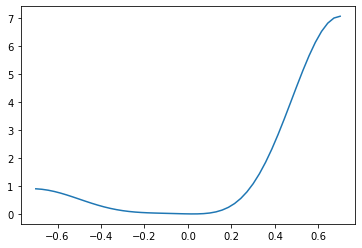

In [8]:
%pylab inline
z = np.linspace(-0.7,0.7, 50)
r = np.zeros([50,3])
r[:,-1] = z
plot(z,electron_density(r))

In [9]:
scf_exec.integrator_3D.integrate(electron_density)

2.0000000000000173